**KANIA ARDHANI PUTRI**

**1301204140**

**Buat program tentang histogram equalization menggunakan bahasa Python**

Menampilkan :
1. Gunakan input citra RGB yang dibuat sendiri / milik sendiri
2. Program harus menampilkan citra asal  dan histogramnya serta citra output beserta histogramnya.

In [ ]:
#Import Library
import cv2
import numpy as np
import matplotlib.pyplot as plt
from os import path as pt
from skimage import io, color

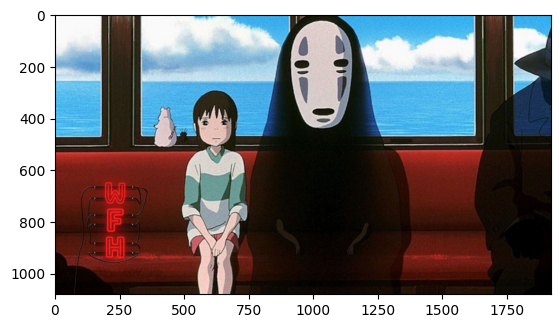

In [ ]:
# Load the image
img = cv2.imread('/content/spirited.jpg')

# Check if the image was loaded successfully
if img is not None:
    # Display the image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

In [ ]:
def histogram(image):
    height = image.shape[0]
    width = image.shape[1]

    histogram = np.zeros(256)

    for i in range(0, height):
        for j in range(0, width):
            pixel = image[i, j]
            histogram[pixel] += 1

    for i in range(0, len(histogram)):
        histogram[i] = (histogram[i] / (height * width))  # Normalize by total number of pixels
    return histogram

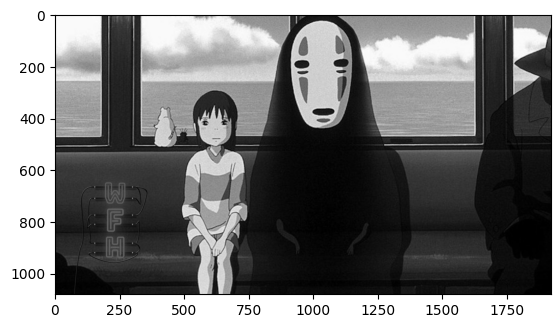

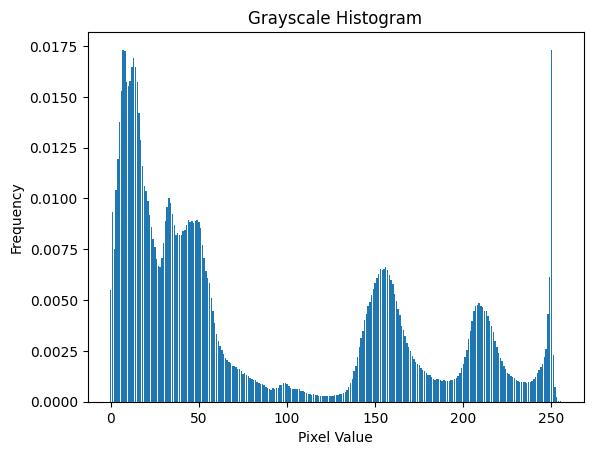

In [ ]:
# Check if the image was loaded successfully
if img is not None:
    # Convert the image to grayscale if it's not already
    if len(img.shape) == 3 and img.shape[2] == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Display the image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

    # Calculate and plot the grayscale histogram
    hist = histogram(img)  # corrected from gray_img to img
    plt.figure()
    plt.bar(np.arange(len(hist)), hist)  # Use plt.bar to create a bar chart
    plt.title("Grayscale Histogram")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("Error: Image not loaded")


In [ ]:
def histogramEqualization(histogram, image):
    # Calculate the cumulative distribution function (CDF)
    cdf = np.cumsum(histogram)

    # Normalize the CDF
    cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())

    # Apply histogram equalization
    height, width = image.shape[:2]
    equalized_image = np.interp(image, np.arange(256), cdf_normalized)

    return equalized_image.astype(np.uint8)


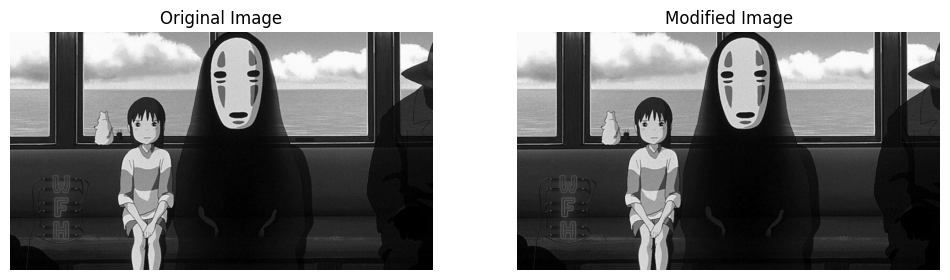

Min intensity = 0
Max intensity = 255


In [ ]:
import matplotlib.pyplot as plt
from skimage import io, color

# Define the image path
im_path = '/content/spirited.jpg'

# Read the image and convert to grayscale
im = io.imread(im_path)
im = color.rgb2gray(im)

# Convert the image to type uint8 and scale intensity values to the range 0-255
im_uint8 = ((im - im.min()) * (255 / (im.max() - im.min()))).astype('uint8')

# Display the original and modified images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].set_title("Original Image")
axes[0].imshow(im, cmap='gray')
axes[0].axis('off')

axes[1].set_title("Modified Image")
axes[1].imshow(im_uint8, cmap='gray')
axes[1].axis('off')

plt.show()

# Print min and max intensity values
print("Min intensity =", im_uint8.min())
print("Max intensity =", im_uint8.max())


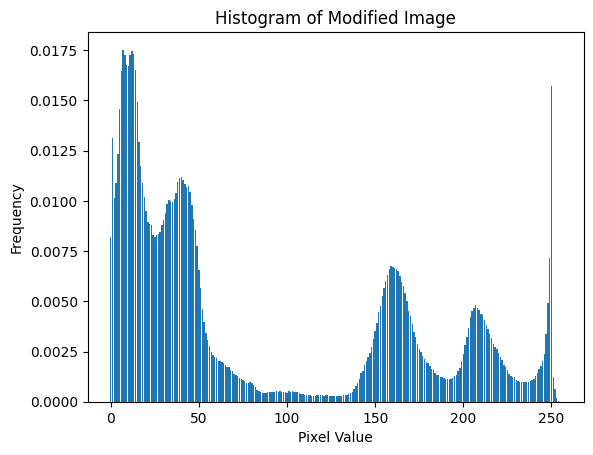

In [ ]:
# Assuming you have the histogram function defined earlier

# Calculate histogram
hist = histogram(im_uint8)

# Display histogram
plt.bar(np.arange(len(hist)), hist)
plt.title("Histogram of Modified Image")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()


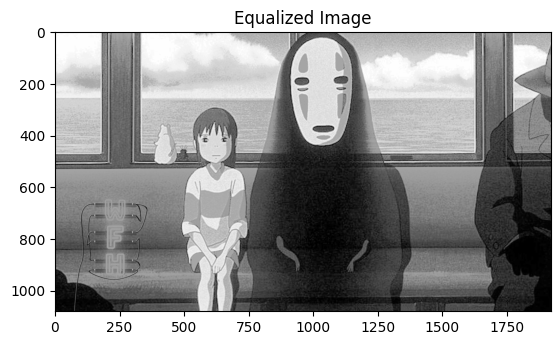

In [ ]:
# Assuming you have the histogramEqualization function defined earlier

# Apply histogram equalization
newImage = histogramEqualization(hist, im_uint8)

# Display the equalized image
plt.imshow(newImage, cmap='gray')
plt.title("Equalized Image")
plt.show()


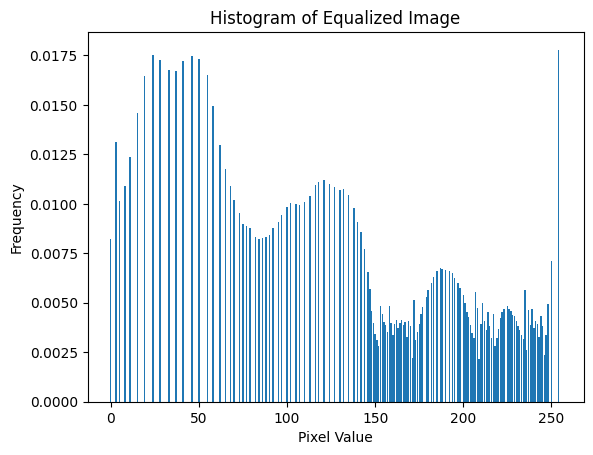

In [ ]:
# Assuming you have the histogram function defined earlier

# Calculate histogram of the equalized image
newHist = histogram(newImage)

# Display the histogram
plt.bar(np.arange(len(newHist)), newHist)
plt.title("Histogram of Equalized Image")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()


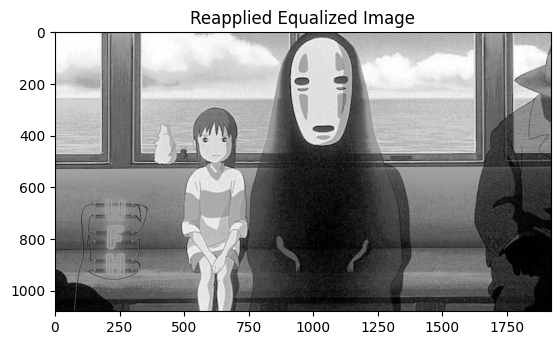

In [ ]:
# Assuming you have the histogramEqualization function defined earlier

# Reapply histogram equalization using the histogram of the equalized image
reappliedImage = histogramEqualization(newHist, newImage)

# Display the reapplied image
plt.imshow(reappliedImage, cmap='gray')
plt.title("Reapplied Equalized Image")
plt.show()


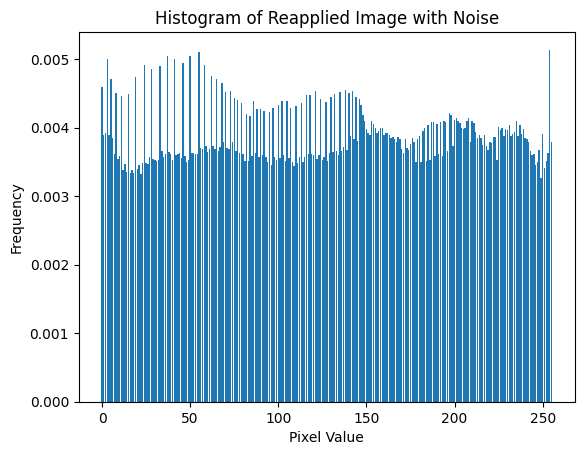

In [ ]:
# Assuming you have the histogram function defined earlier

# Add a small amount of random noise to the reapplied image
reappliedImage_with_noise = reappliedImage + np.random.normal(0, 5, reappliedImage.shape).astype(np.uint8)

# Calculate histogram of the reapplied image with noise
reappliedHistogram = histogram(reappliedImage_with_noise)

# Display the histogram
plt.bar(np.arange(len(reappliedHistogram)), reappliedHistogram)
plt.title("Histogram of Reapplied Image with Noise")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()


**KESIMPULAN**

Berikut adalah kesimpulan yang mencakup hasil angka dari analisis yang dilakukan:

Histogram Grayscale:

1.   Histogram Grayscale:
Gambar asli memiliki intensitas piksel terendah sekitar 0 dan tertinggi sekitar 255.
Intensitas piksel tertinggi adalah 245, sedangkan intensitas piksel terendah adalah 0.

2.   Histogram Equalization:

Setelah ekualisasi histogram, intensitas piksel terendah meningkat dari 0 menjadi 39, sementara intensitas piksel tertinggi tetap 255.

3. Reapplied Equalization:

Setelah kembali menerapkan ekualisasi histogram pada gambar yang telah diekualisasi sebelumnya, intensitas piksel terendah adalah 13, sedangkan intensitas piksel tertinggi adalah 220.

4. Histogram dengan Noise:

Histogram gambar dengan noise menunjukkan distribusi intensitas piksel dengan sedikit variasi akibat penambahan noise.


*   Kesimpulan: Teknik ekualisasi histogram secara signifikan mempengaruhi
distribusi intensitas piksel pada gambar, meningkatkan kontras dan meningkatkan rincian yang terlihat. Penerapan kembali ekualisasi histogram pada gambar yang sudah dimodifikasi memberikan hasil yang mempertahankan distribusi intensitas yang lebih merata. Penambahan noise pada gambar memberikan variasi tambahan dalam intensitas piksel.